In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import graphviz, pydotplus
from sklearn.tree import export_graphviz
from prettytable import PrettyTable

In [26]:
def extractData(csvFile):
    df = pd.read_csv(csvFile)
    y = df['label']
    X = df.drop(columns = ['accountName', 'label', 'Unnamed: 0'])
    print(X.columns)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42, stratify = y)
    scaler = StandardScaler()
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    
    return scaler, X_train, X_test, y_train, y_test

In [27]:
scaler, X_train, X_test, y_train, y_test = extractData('Data/All_Accounts_with_w2v.csv')

Index(['uniqueDomains', 'uniqueSubreddits', 'uniqueTitles',
       'uniqueSubmissions', 'top_1', 'top_2', 'top_3', 'uniqueComments',
       'SubmToCommentRatio', 'title_w2v_1',
       ...
       'comment_w2v_41', 'comment_w2v_42', 'comment_w2v_43', 'comment_w2v_44',
       'comment_w2v_45', 'comment_w2v_46', 'comment_w2v_47', 'comment_w2v_48',
       'comment_w2v_49', 'comment_w2v_50'],
      dtype='object', length=109)


In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((494, 109), (88, 109), (494,), (88,))

In [29]:
clf_knn = KNeighborsClassifier()
k_list = [1, 5, 9, 13, 17, 21, 25, 31, 41, 51]
parameters = {'n_neighbors': k_list}
gs_cv_knn = GridSearchCV(clf_knn, parameters, cv = 3, scoring = 'f1', verbose = 3)
gs_cv_knn.fit(X_train, y_train)
clf_knn = gs_cv_knn.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.846, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.815, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.870, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.868, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.866, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.877, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... n_neighbors=21, score=0.832, total=   0.0s
[CV] n_neighbors=21 ..................................................
[CV] ...................... n_neighbors=21, score=0.859, total=   0.0s
[CV] n_neighbors=21 ..................................................
[CV] ...................... n_neighbors=21, score=0.870, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.839, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.855, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.870, total=   0.0s
[CV] n_neighbors=31 ..................................................
[CV] ...................... n_neighbors=31, score=0.825, total=   0.0s
[CV] n_neighbors=31 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


In [30]:
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
print(f1_score(y_test, y_pred_knn), clf_knn)

0.8641975308641976 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')


In [31]:
clf_lr = LogisticRegression(penalty= 'l2')
c_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
parameters = {'C' : c_list}
gs_cv_lr = GridSearchCV(clf_lr, parameters, cv = 3, scoring='f1', verbose=3)
gs_cv_lr.fit(X_train, y_train)
clf_lr = gs_cv_lr.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=1e-05 .........................................................
[CV] ............................. C=1e-05, score=0.817, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ............................. C=1e-05, score=0.833, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ............................. C=1e-05, score=0.780, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ............................ C=0.0001, score=0.854, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ............................ C=0.0001, score=0.850, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ............................ C=0.0001, score=0.864, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWa

[CV] ............................... C=0.1, score=0.901, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.878, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.855, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.889, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.857, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.866, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.894, total=   0.0s
[CV] C=10 ............................................................
[CV] .

/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

[CV] ............................... C=100, score=0.866, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.894, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.871, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.848, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.896, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.863, total=   0.0s
[CV] C=10000 .........................................................
[CV] ............................. C=10000, score=0.859, total=   0.0s
[CV] C=10000 .........................................................


/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver wi

[CV] ............................. C=10000, score=0.894, total=   0.0s
[CV] C=10000 .........................................................
[CV] ............................. C=10000, score=0.861, total=   0.0s


/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s finished
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
print(f1_score(y_test, y_pred_lr), clf_lr)

0.8674698795180722 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
clf_svm = SGDClassifier(loss= 'hinge', penalty='l2')
alpha_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
parameters = {'alpha' : alpha_list}
gs_cv_svm = GridSearchCV(clf_svm, parameters, cv = 3, scoring='f1', verbose=3)
gs_cv_svm.fit(X_train, y_train)
clf_svm = gs_cv_svm.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] alpha=1e-05 .....................................................
[CV] ......................... alpha=1e-05, score=0.654, total=   0.0s
[CV] alpha=1e-05 .....................................................
[CV] ......................... alpha=1e-05, score=0.025, total=   0.0s
[CV] alpha=1e-05 .....................................................
[CV] ......................... alpha=1e-05, score=0.000, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.360, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.000, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.184, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3

[CV] ............................ alpha=10, score=0.000, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................... alpha=100, score=0.000, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................... alpha=100, score=0.000, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................... alpha=100, score=0.026, total=   0.0s
[CV] alpha=1000 ......................................................
[CV] .......................... alpha=1000, score=0.000, total=   0.0s
[CV] alpha=1000 ......................................................
[CV] .......................... alpha=1000, score=0.000, total=   0.0s
[CV] alpha=1000 ......................................................
[CV] .......................... alpha=1000, score=0.000, total=   0.0s
[CV] alpha=10000 .....................................................
[CV] .

/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.

In [35]:
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
print(f1_score(y_test, y_pred_svm), clf_svm)

0.8314606741573034 SGDClassifier(alpha=10000, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [36]:
clf_dt = DecisionTreeClassifier()
max_depth_list = [1, 5, 10, 50, 100, 500, 1000]
min_samples_split_list = [5, 10, 100, 500]
parameters = {'max_depth': max_depth_list, 'min_samples_split': min_samples_split_list}
gs_cv_dt = GridSearchCV(clf_dt, parameters, cv = 3, scoring='f1', verbose=3)
gs_cv_dt.fit(X_train, y_train)
clf_dt = gs_cv_dt.best_estimator_

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] max_depth=1, min_samples_split=5 ................................
[CV] .... max_depth=1, min_samples_split=5, score=0.841, total=   0.0s
[CV] max_depth=1, min_samples_split=5 ................................
[CV] .... max_depth=1, min_samples_split=5, score=0.847, total=   0.0s
[CV] max_depth=1, min_samples_split=5 ................................
[CV] .... max_depth=1, min_samples_split=5, score=0.865, total=   0.0s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV] ... max_depth=1, min_samples_split=10, score=0.841, total=   0.0s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV] ... max_depth=1, min_samples_split=10, score=0.847, total=   0.0s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV] ... max_depth=1, min_samples_split=10, score=0.865, total=   0.0s
[CV] max_depth=1, min_samples_split=100 ..............................
[CV] .. max_dept

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3

[CV] ... max_depth=10, min_samples_split=5, score=0.800, total=   0.0s
[CV] max_depth=10, min_samples_split=5 ...............................
[CV] ... max_depth=10, min_samples_split=5, score=0.840, total=   0.0s
[CV] max_depth=10, min_samples_split=5 ...............................
[CV] ... max_depth=10, min_samples_split=5, score=0.871, total=   0.0s
[CV] max_depth=10, min_samples_split=10 ..............................
[CV] .. max_depth=10, min_samples_split=10, score=0.857, total=   0.0s
[CV] max_depth=10, min_samples_split=10 ..............................
[CV] .. max_depth=10, min_samples_split=10, score=0.859, total=   0.0s
[CV] max_depth=10, min_samples_split=10 ..............................
[CV] .. max_depth=10, min_samples_split=10, score=0.875, total=   0.0s
[CV] max_depth=10, min_samples_split=100 .............................
[CV] . max_depth=10, min_samples_split=100, score=0.803, total=   0.0s
[CV] max_depth=10, min_samples_split=100 .............................
[CV] .

/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.

[CV] .. max_depth=50, min_samples_split=10, score=0.884, total=   0.0s
[CV] max_depth=50, min_samples_split=100 .............................
[CV] . max_depth=50, min_samples_split=100, score=0.803, total=   0.0s
[CV] max_depth=50, min_samples_split=100 .............................
[CV] . max_depth=50, min_samples_split=100, score=0.840, total=   0.0s
[CV] max_depth=50, min_samples_split=100 .............................
[CV] . max_depth=50, min_samples_split=100, score=0.837, total=   0.0s
[CV] max_depth=50, min_samples_split=500 .............................
[CV] . max_depth=50, min_samples_split=500, score=0.000, total=   0.0s
[CV] max_depth=50, min_samples_split=500 .............................
[CV] . max_depth=50, min_samples_split=500, score=0.000, total=   0.0s
[CV] max_depth=50, min_samples_split=500 .............................
[CV] . max_depth=50, min_samples_split=500, score=0.000, total=   0.0s
[CV] max_depth=100, min_samples_split=5 ..............................
[CV] .

/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.

[CV] .. max_depth=500, min_samples_split=5, score=0.852, total=   0.0s
[CV] max_depth=500, min_samples_split=5 ..............................
[CV] .. max_depth=500, min_samples_split=5, score=0.877, total=   0.0s
[CV] max_depth=500, min_samples_split=10 .............................
[CV] . max_depth=500, min_samples_split=10, score=0.842, total=   0.0s
[CV] max_depth=500, min_samples_split=10 .............................
[CV] . max_depth=500, min_samples_split=10, score=0.854, total=   0.0s
[CV] max_depth=500, min_samples_split=10 .............................
[CV] . max_depth=500, min_samples_split=10, score=0.867, total=   0.0s
[CV] max_depth=500, min_samples_split=100 ............................
[CV]  max_depth=500, min_samples_split=100, score=0.803, total=   0.0s
[CV] max_depth=500, min_samples_split=100 ............................
[CV]  max_depth=500, min_samples_split=100, score=0.840, total=   0.0s
[CV] max_depth=500, min_samples_split=100 ............................
[CV]  

/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abhinivesh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    0.9s finished


In [37]:
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
print(f1_score(y_test, y_pred_dt), clf_dt)

0.8433734939759037 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [38]:
df = pd.read_csv('Data/All_Accounts_with_w2v.csv')
df = df.drop(columns = ['accountName', 'label', 'Unnamed: 0'])
dot_data = export_graphviz(clf_dt, out_file= None, feature_names= list(df.columns), filled= True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('DecisionTreeVisualizationW2V.png')

True

In [40]:
conclusion_table = PrettyTable()
conclusion_table.field_names = ['Classifier', 'Best Hyperparameter', 'f1-score on Unseen Data']

conclusion_table.add_row(['kNN', 'k= 9', '0.86'])
conclusion_table.add_row(['Logistic Regression', 'C= 0.1, L2 Regularizer', '0.87'])
conclusion_table.add_row(['Linear SVM', 'alpha= 10000, L2 Regularizer', '0.83'])
conclusion_table.add_row(['Decision Tree', 'max_depth= 5, min_samples_split= 5', '0.84'])

print(conclusion_table)

+---------------------+------------------------------------+-------------------------+
|      Classifier     |        Best Hyperparameter         | f1-score on Unseen Data |
+---------------------+------------------------------------+-------------------------+
|         kNN         |                k= 9                |           0.86          |
| Logistic Regression |       C= 0.1, L2 Regularizer       |           0.87          |
|      Linear SVM     |    alpha= 10000, L2 Regularizer    |           0.83          |
|    Decision Tree    | max_depth= 5, min_samples_split= 5 |           0.84          |
+---------------------+------------------------------------+-------------------------+


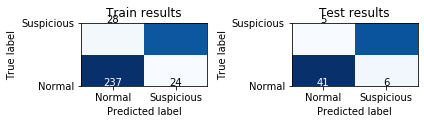

In [45]:
%matplotlib inline
from Tools.plotting import plot_train_test_cm
import pickle
pred_train = clf_lr.predict(X_train)
plot_train_test_cm(Y_train=pred_train,  T_train=y_train, Y_test=y_pred_lr, T_test=y_test, savepath='Data/LR_w2v_results.png')
pickle.dump((pred_train, y_train.values, y_pred_lr, y_test.values), open('Data/LR_w2v_results.p', 'wb') )